# Comparing the performances of L1-Regularized Sparse Logistic Regression and Graph-Sparse Logistic Regression on Synthetic Data *for multiple sparsities*

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (17, 8)

import pickle
import pandas as pd
import seaborn as sns; sns.set_style("whitegrid")

repo_path = '/Users/alex/Documents/gslr/'
KEGG_path = repo_path + 'experiments/KEGG/KEGG_df.filtered.with_correlates.pickle'

Populating the interactive namespace from numpy and matplotlib


In [2]:
pathways_df = pd.read_pickle(KEGG_path)
pathways_ids = pathways_df.index.get_level_values(2)
# pathways = {pathway_id: set(pathways_df.loc[pd.IndexSlice[:, :, [pathway_id]],['genes', 'correlates']].values[0][0]) for pathway_id in pathways_df.index.get_level_values(2)}

In [3]:
logit_scores = pd.read_pickle('logit/logit_pr_scores.pickle')
logit_recalls = pd.read_pickle('logit/logit_pr_recalls.pickle')
logit_precisions = pd.read_pickle('logit/logit_pr_precisions.pickle')

logit_gmm_scores = pd.read_pickle('logit/logit_gmm_pr_scores.pickle')
logit_gmm_recalls = pd.read_pickle('logit/logit_gmm_pr_recalls.pickle')
logit_gmm_precisions = pd.read_pickle('logit/logit_gmm_pr_precisions.pickle')

gslr_scores = pd.read_pickle('gslr/gslr_pr_scores.pickle')
gslr_recalls = pd.read_pickle('gslr/gslr_pr_recalls.pickle')
gslr_precisions = pd.read_pickle('gslr/gslr_pr_precisions.pickle')

gslr_gmm_scores = pd.read_pickle('gslr/gslr_gmm_pr_scores.pickle')
gslr_gmm_recalls = pd.read_pickle('gslr/gslr_gmm_pr_recalls.pickle')
gslr_gmm_precisions = pd.read_pickle('gslr/gslr_gmm_pr_precisions.pickle')

In [4]:
def remove_0_0(recalls, precisions): return tuple(zip(*[(recall, precision) for recall, precision in zip(recalls, precisions) if not (recall == 0 and precision == 0)]))

## I. All Datasets / All Folds / All Sparsities: One by One

### i. "Hard" Datasets

#### L1-regularized Logistic Regression

(0.0, 1.0)

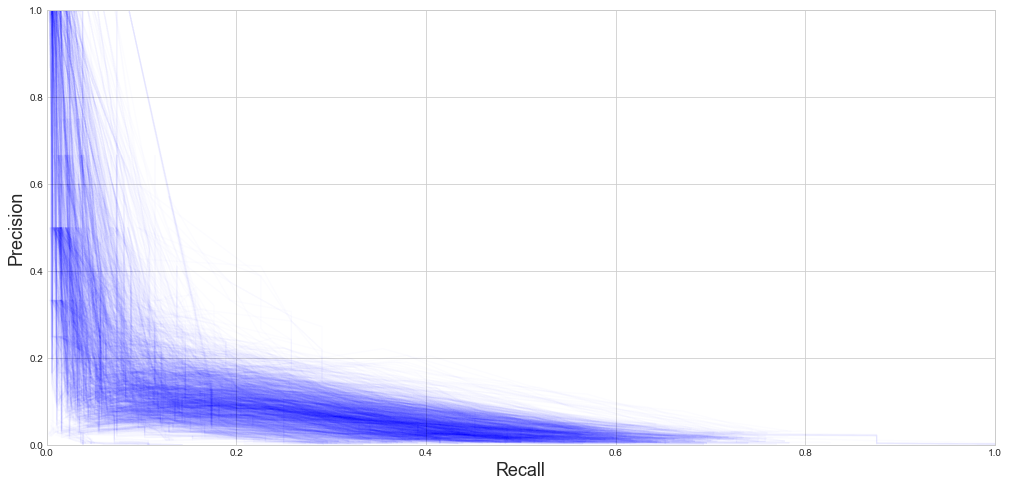

In [6]:
[plt.plot(*remove_0_0(logit_recalls.iloc[k].values, logit_precisions.iloc[k].values), c='b', alpha=0.01) for k in range(len(logit_recalls))]

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

#### Graph-Sparse Logistic Regression

(0.0, 1.0)

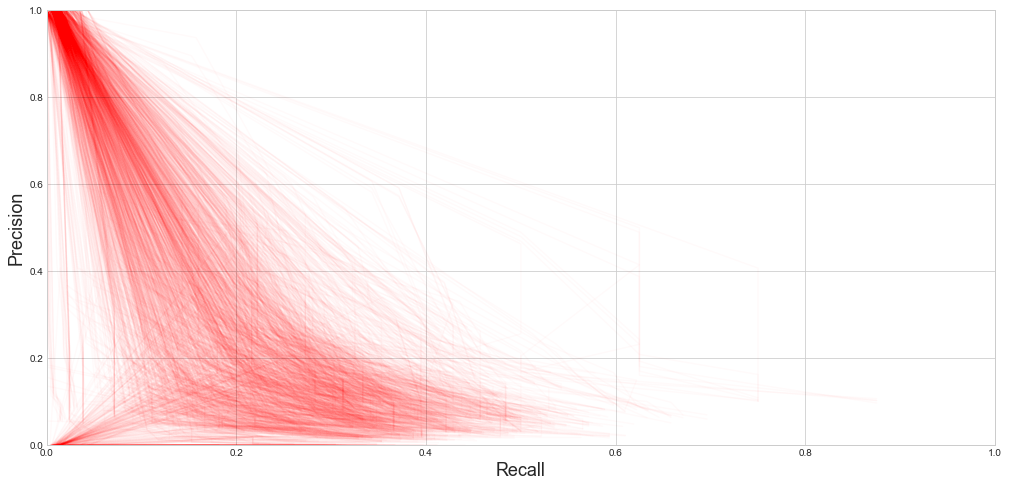

In [7]:
[plt.plot(*remove_0_0(gslr_recalls.iloc[k].values, gslr_precisions.iloc[k].values), c='r', alpha=0.02) for k in range(len(gslr_recalls))]

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

### i. "Easy" Datasets

#### L1-regularized Logistic Regression

(0.0, 1.0)

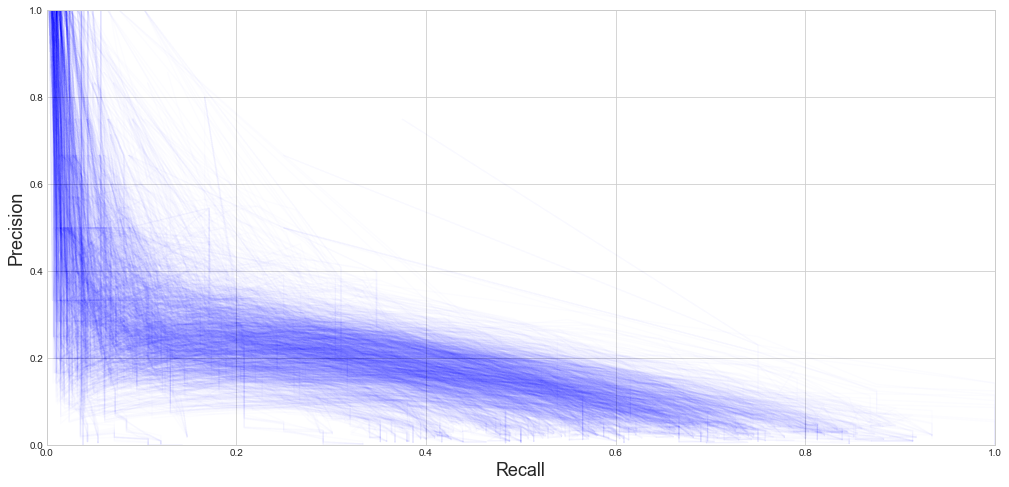

In [8]:
[plt.plot(*remove_0_0(logit_gmm_recalls.iloc[k].values, logit_gmm_precisions.iloc[k].values), c='b', alpha=0.01) for k in range(len(logit_gmm_recalls))]

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

#### Graph-Sparse Logistic Regression

(0.0, 1.0)

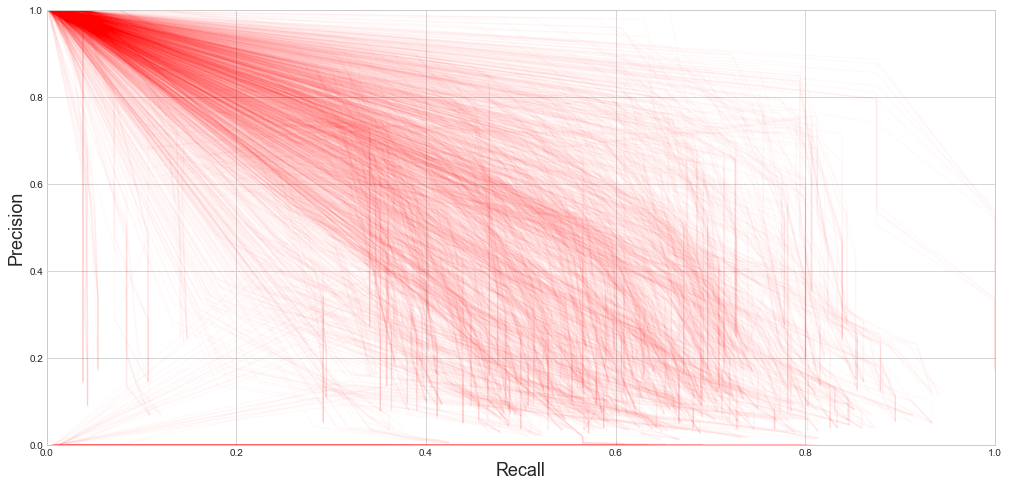

In [9]:
[plt.plot(*remove_0_0(gslr_gmm_recalls.iloc[k].values, gslr_gmm_precisions.iloc[k].values), c='r', alpha=0.02) for k in range(len(gslr_gmm_recalls))]

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

## II. All Datasets / All Folds / All Sparsities: Together

### i. "Hard" Datasets

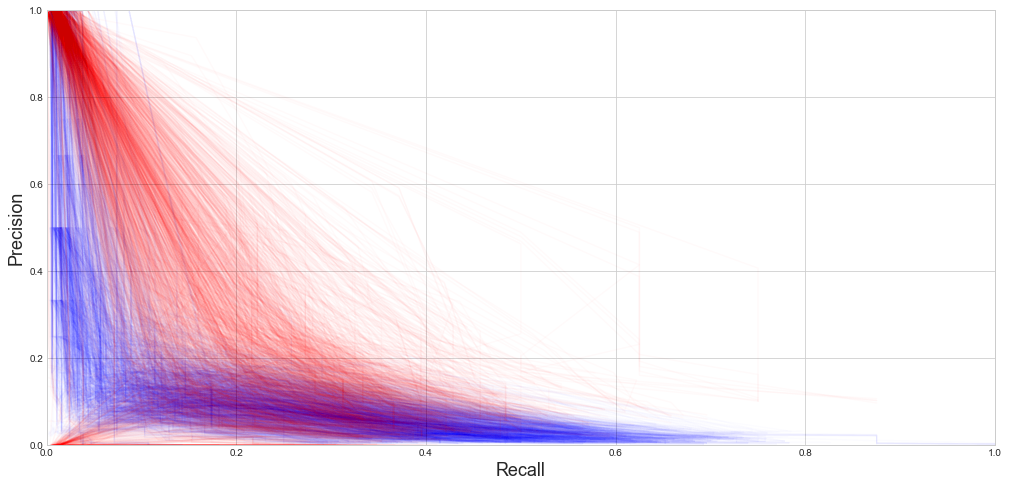

In [10]:
[plt.plot(*remove_0_0(logit_recalls.iloc[k].values, logit_precisions.iloc[k].values), c='b', alpha=0.01) for k in range(len(logit_recalls))]
[plt.plot(*remove_0_0(gslr_recalls.iloc[k].values, gslr_precisions.iloc[k].values), c='r', alpha=0.02) for k in range(len(gslr_recalls))]

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.savefig("hard.pdf")

### i. "Easy" Datasets

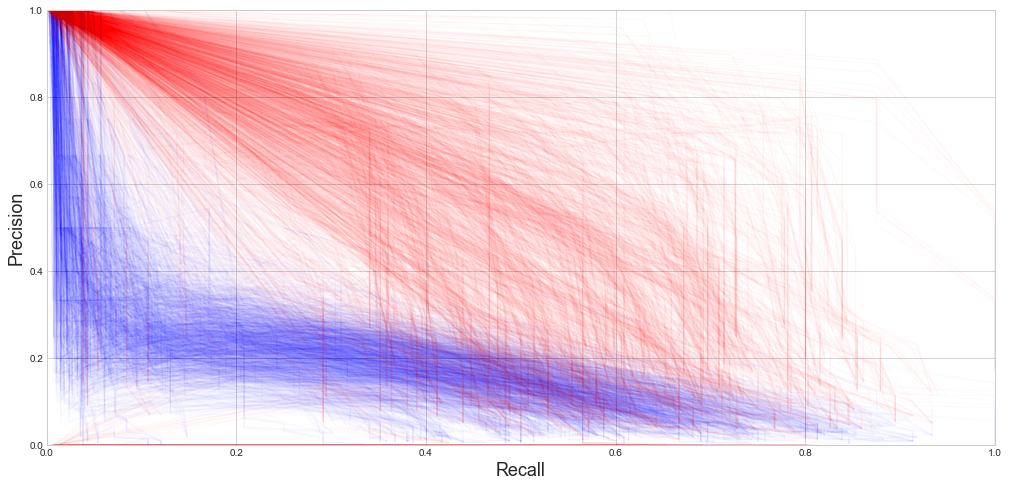

In [11]:
[plt.plot(*remove_0_0(logit_gmm_recalls.iloc[k].values, logit_gmm_precisions.iloc[k].values), c='b', alpha=0.01) for k in range(len(logit_gmm_recalls))]
[plt.plot(*remove_0_0(gslr_gmm_recalls.iloc[k].values, gslr_gmm_precisions.iloc[k].values), c='r', alpha=0.02) for k in range(len(gslr_gmm_recalls))]

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.savefig("easy.pdf")

## III. Individual Datasets / All Folds / All Sparsities

In [12]:
pathways_ids

Index(['hsa04110', 'hsa04114', 'hsa04115', 'hsa04210', 'hsa04215', 'hsa04216',
       'hsa04217', 'hsa04218', 'hsa04810', 'hsa04510',
       ...
       'hsa04724', 'hsa04725', 'hsa04726', 'hsa04727', 'hsa04728', 'hsa04730',
       'hsa04740', 'hsa04742', 'hsa04744', 'hsa04750'],
      dtype='object', name='id', length=229)

## hsa04110

In [13]:
pathway_id = 'hsa04110'

### i. "Hard" Dataset

(0.0, 1.0)

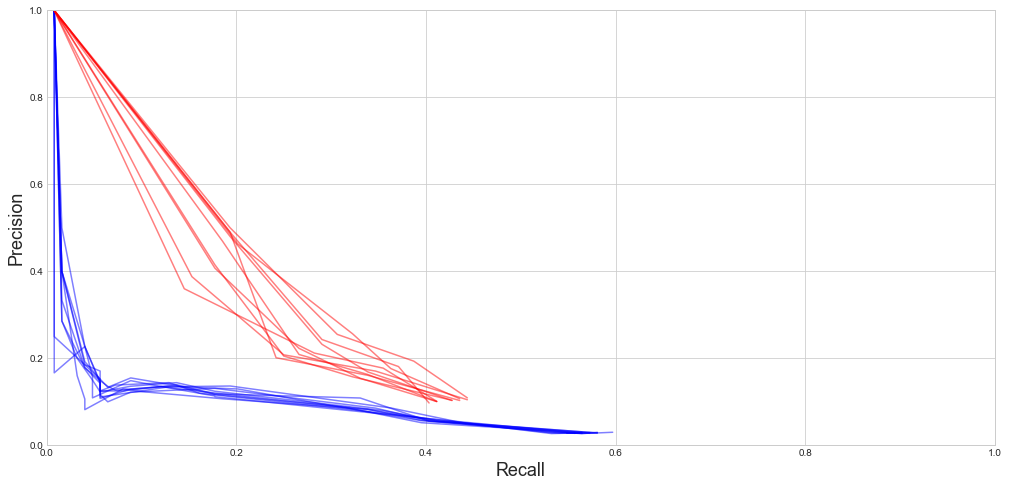

In [14]:
[plt.plot(*remove_0_0(logit_recalls.loc[pathway_id].iloc[k].values, logit_precisions.loc[pathway_id].iloc[k].values), c='b', alpha=0.5) for k in range(len(logit_recalls.loc[pathway_id]))]
[plt.plot(*remove_0_0(gslr_recalls.loc[pathway_id].iloc[k].values, gslr_precisions.loc[pathway_id].iloc[k].values), c='r', alpha=0.5) for k in range(len(gslr_recalls.loc[pathway_id]))]

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

### ii. "Easy" Dataset

(0.0, 1.0)

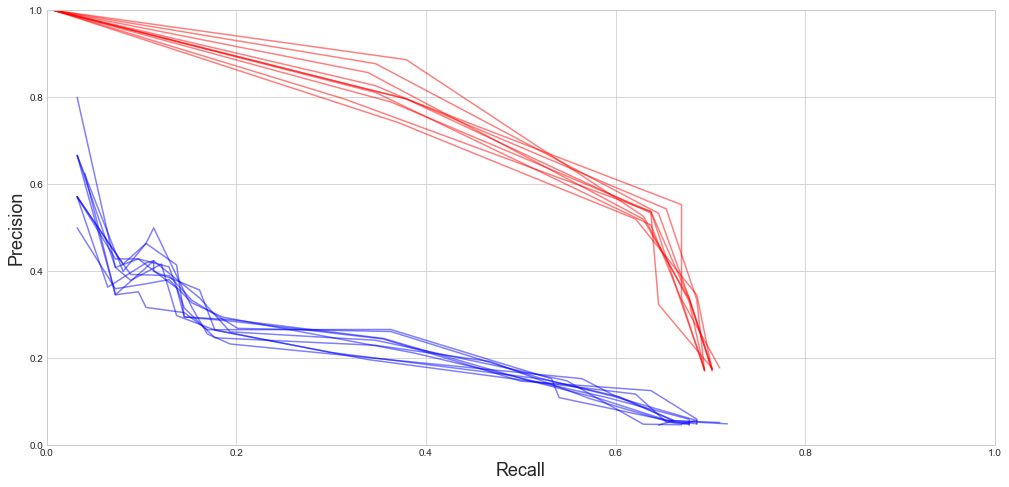

In [15]:
[plt.plot(*remove_0_0(logit_gmm_recalls.loc[pathway_id].iloc[k].values, logit_gmm_precisions.loc[pathway_id].iloc[k].values), c='b', alpha=0.5) for k in range(len(logit_gmm_recalls.loc[pathway_id]))]
[plt.plot(*remove_0_0(gslr_gmm_recalls.loc[pathway_id].iloc[k].values, gslr_gmm_precisions.loc[pathway_id].iloc[k].values), c='r', alpha=0.5) for k in range(len(gslr_gmm_recalls.loc[pathway_id]))]

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

## hsa04750

In [16]:
pathway_id = 'hsa04750'

### i. "Hard" Dataset

(0.0, 1.0)

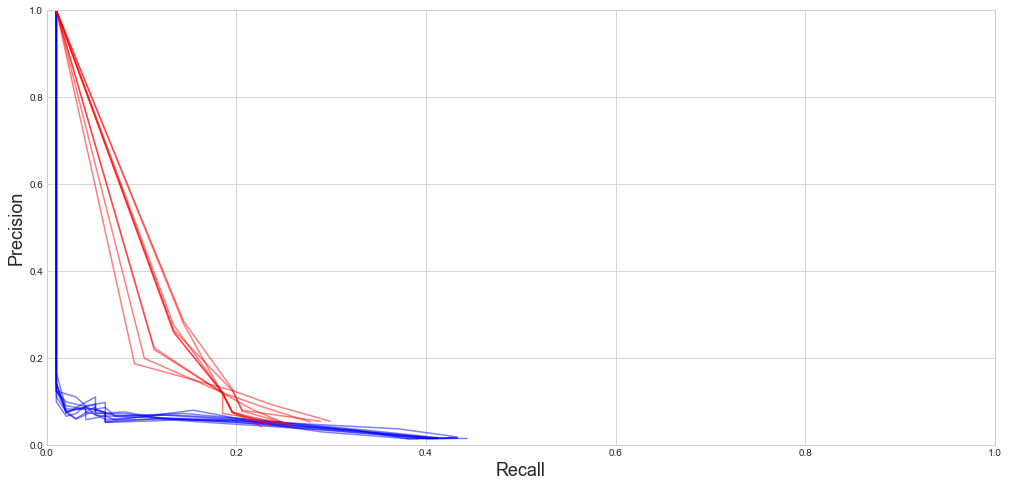

In [17]:
[plt.plot(*remove_0_0(logit_recalls.loc[pathway_id].iloc[k].values, logit_precisions.loc[pathway_id].iloc[k].values), c='b', alpha=0.5) for k in range(len(logit_recalls.loc[pathway_id]))]
[plt.plot(*remove_0_0(gslr_recalls.loc[pathway_id].iloc[k].values, gslr_precisions.loc[pathway_id].iloc[k].values), c='r', alpha=0.5) for k in range(len(gslr_recalls.loc[pathway_id]))]

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

### ii. "Easy" Dataset

(0.0, 1.0)

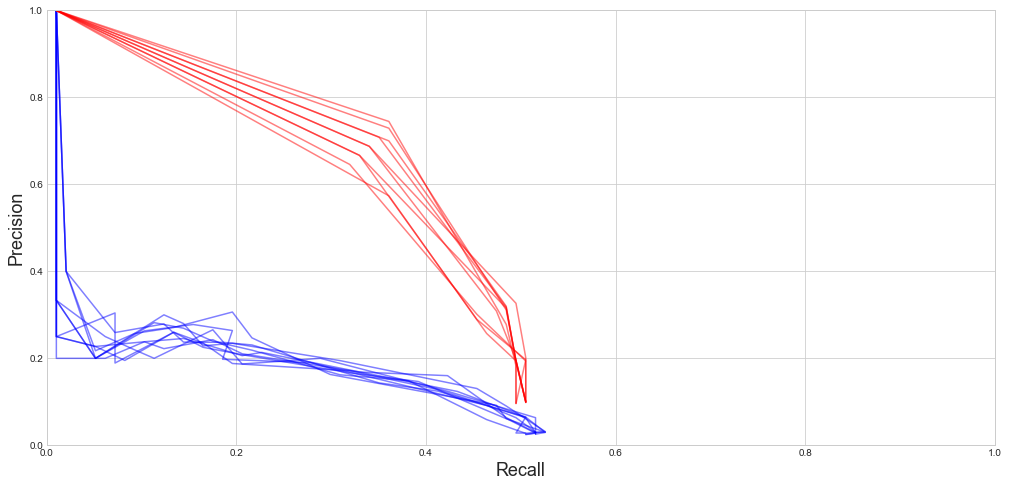

In [18]:
[plt.plot(*remove_0_0(logit_gmm_recalls.loc[pathway_id].iloc[k].values, logit_gmm_precisions.loc[pathway_id].iloc[k].values), c='b', alpha=0.5) for k in range(len(logit_gmm_recalls.loc[pathway_id]))]
[plt.plot(*remove_0_0(gslr_gmm_recalls.loc[pathway_id].iloc[k].values, gslr_gmm_precisions.loc[pathway_id].iloc[k].values), c='r', alpha=0.5) for k in range(len(gslr_gmm_recalls.loc[pathway_id]))]

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

## hsa04810

In [19]:
pathway_id = 'hsa04810'

### i. "Hard" Dataset

(0.0, 1.0)

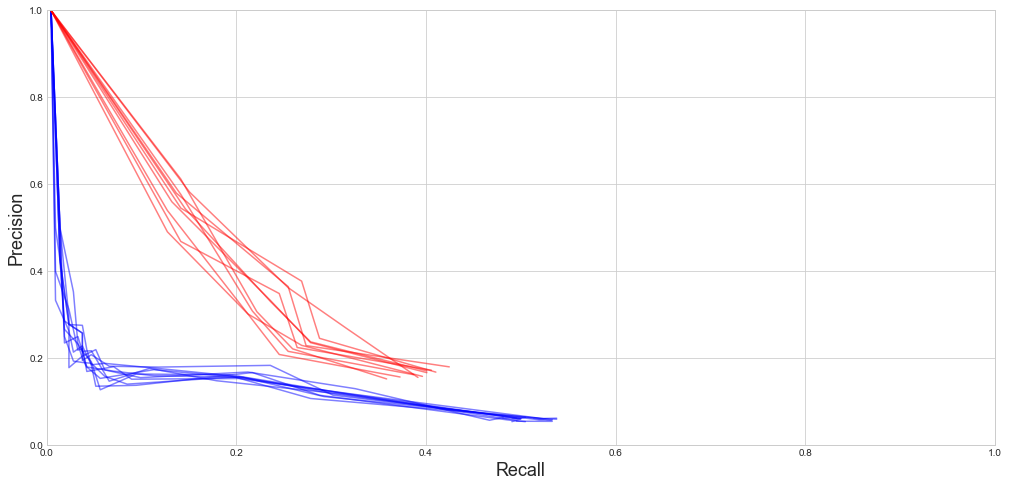

In [20]:
[plt.plot(*remove_0_0(logit_recalls.loc[pathway_id].iloc[k].values, logit_precisions.loc[pathway_id].iloc[k].values), c='b', alpha=0.5) for k in range(len(logit_recalls.loc[pathway_id]))]
[plt.plot(*remove_0_0(gslr_recalls.loc[pathway_id].iloc[k].values, gslr_precisions.loc[pathway_id].iloc[k].values), c='r', alpha=0.5) for k in range(len(gslr_recalls.loc[pathway_id]))]

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

### ii. "Easy" Dataset

(0.0, 1.0)

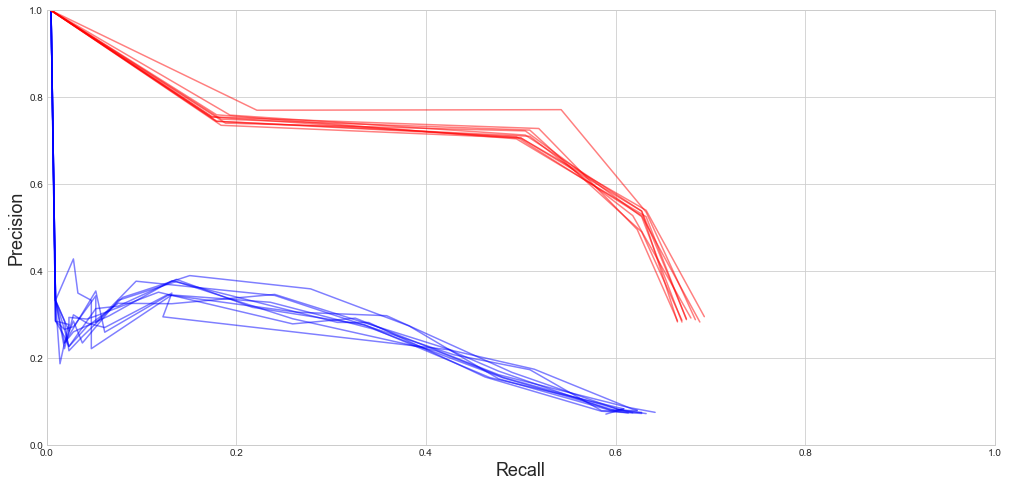

In [21]:
[plt.plot(*remove_0_0(logit_gmm_recalls.loc[pathway_id].iloc[k].values, logit_gmm_precisions.loc[pathway_id].iloc[k].values), c='b', alpha=0.5) for k in range(len(logit_gmm_recalls.loc[pathway_id]))]
[plt.plot(*remove_0_0(gslr_gmm_recalls.loc[pathway_id].iloc[k].values, gslr_gmm_precisions.loc[pathway_id].iloc[k].values), c='r', alpha=0.5) for k in range(len(gslr_gmm_recalls.loc[pathway_id]))]

plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])